In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Palestine/fatalities_isr_pse_conflict_2000_to_2023.csv")

In [4]:
df.head(2).T

,0,1
name,'Abd a-Rahman Suleiman Muhammad Abu Daghash,Usayed Farhan Muhammad 'Ali Abu 'Ali
date_of_event,2023-09-24,2023-09-24
age,32.0,21.0
citizenship,Palestinian,Palestinian
event_location,Nur Shams R.C.,Nur Shams R.C.
event_location_district,Tulkarm,Tulkarm
event_location_region,West Bank,West Bank
date_of_death,2023-09-24,2023-09-24
gender,M,M
took_part_in_the_hostilities,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [6]:
df.shape

(11124, 16)

In [7]:
df.groupby("gender").sum()

,age
gender,
F,42075.0
M,251994.0


In [8]:
df.duplicated().sum()

7

In [9]:
df.isnull().sum()*100/len(df)

name                             0.000000
date_of_event                    0.000000
age                              1.159655
citizenship                      0.000000
event_location                   0.000000
event_location_district          0.000000
event_location_region            0.000000
date_of_death                    0.000000
gender                           0.179791
took_part_in_the_hostilities    12.855088
place_of_residence               0.611291
place_of_residence_district      0.611291
type_of_injury                   2.615965
ammunition                      47.222222
killed_by                        0.000000
notes                            2.517080
dtype: float64

In [10]:
df.drop("notes",axis=1,inplace=True)

In [11]:
df["age"].fillna(df["age"].mode()[0],inplace=True)

In [12]:
df["gender"].fillna(df["gender"].mode()[0],inplace=True)

In [13]:
df["ammunition"].fillna(("ammunition"),inplace=True)

In [14]:
df.dropna(subset="took_part_in_the_hostilities",inplace=True)

In [15]:
df["place_of_residence"].fillna("unknown",inplace=True)

In [16]:
df["type_of_injury"].fillna("unknown",inplace=True)

In [17]:
df["place_of_residence_district"].fillna("unknown",inplace=True)

In [18]:
df.nunique()

name                            9653
date_of_event                   1806
age                               95
citizenship                        3
event_location                   360
event_location_district           19
event_location_region              3
date_of_death                   1976
gender                             2
took_part_in_the_hostilities       5
place_of_residence               432
place_of_residence_district       21
type_of_injury                    10
ammunition                        18
killed_by                          3
dtype: int64

In [19]:
df["date_of_event"]=pd.to_datetime(df["date_of_event"])

In [20]:
df["date_of_death"] = pd.to_datetime(df["date_of_death"])

In [21]:
df["year"] = df["date_of_event"].dt.to_period("Y")

In [22]:
df["month"] = df["date_of_event"].dt.month_name()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9694 entries, 6 to 11123
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          9694 non-null   object        
 1   date_of_event                 9694 non-null   datetime64[ns]
 2   age                           9694 non-null   float64       
 3   citizenship                   9694 non-null   object        
 4   event_location                9694 non-null   object        
 5   event_location_district       9694 non-null   object        
 6   event_location_region         9694 non-null   object        
 7   date_of_death                 9694 non-null   datetime64[ns]
 8   gender                        9694 non-null   object        
 9   took_part_in_the_hostilities  9694 non-null   object        
 10  place_of_residence            9694 non-null   object        
 11  place_of_residence_district  

In [24]:
plt.style.use("seaborn")

In [25]:
df.citizenship.value_counts()

Palestinian    8921
Israeli         772
Jordanian         1
Name: citizenship, dtype: int64

In [26]:
df.head(3).T

,6,94,95
name,Yusef Salem Yusef Radwan,Iyad al-'Abed al-Hasani,Muhammad Walid Muhammad 'Abd al-'Aal
date_of_event,2023-09-19 00:00:00,2023-05-12 00:00:00,2023-05-12 00:00:00
age,24.0,51.0,33.0
citizenship,Palestinian,Palestinian,Palestinian
event_location,Gaza City,Gaza City,Gaza City
event_location_district,Gaza,Gaza,Gaza
event_location_region,Gaza Strip,Gaza Strip,Gaza Strip
date_of_death,2023-09-19 00:00:00,2023-05-12 00:00:00,2023-05-12 00:00:00
gender,M,M,M
took_part_in_the_hostilities,No,Yes,Yes


<AxesSubplot:ylabel='killed_by'>

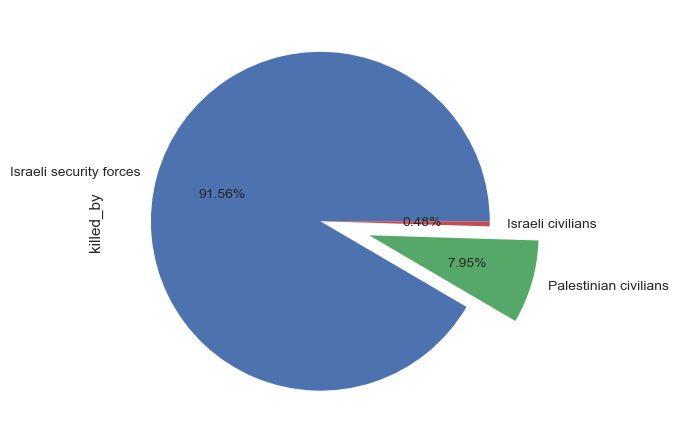

In [27]:
df["killed_by"].value_counts().plot(kind="pie",autopct="%0.2f%%",shadow=False,explode=[0,0.3,0])

<AxesSubplot:title={'center':'Distribution of Age'}, xlabel='age', ylabel='Count'>

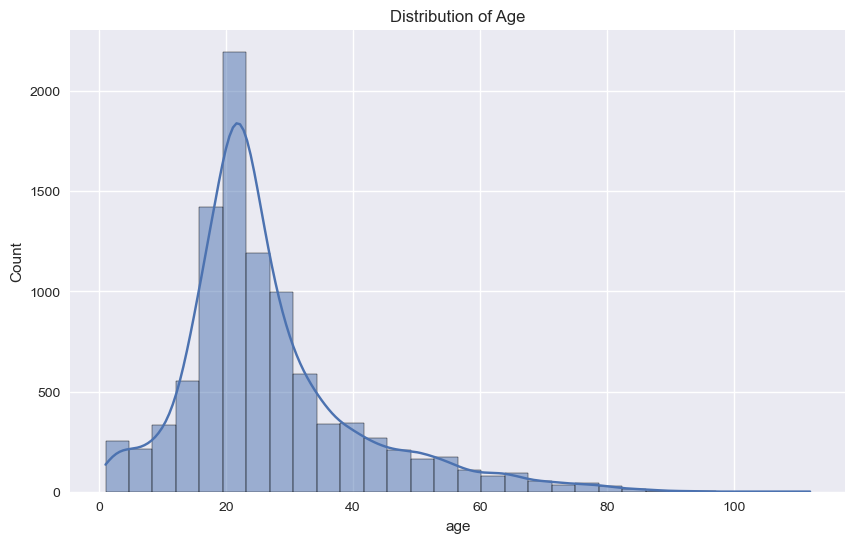

In [28]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Age")
sns.histplot(df["age"],kde=True,bins=30)

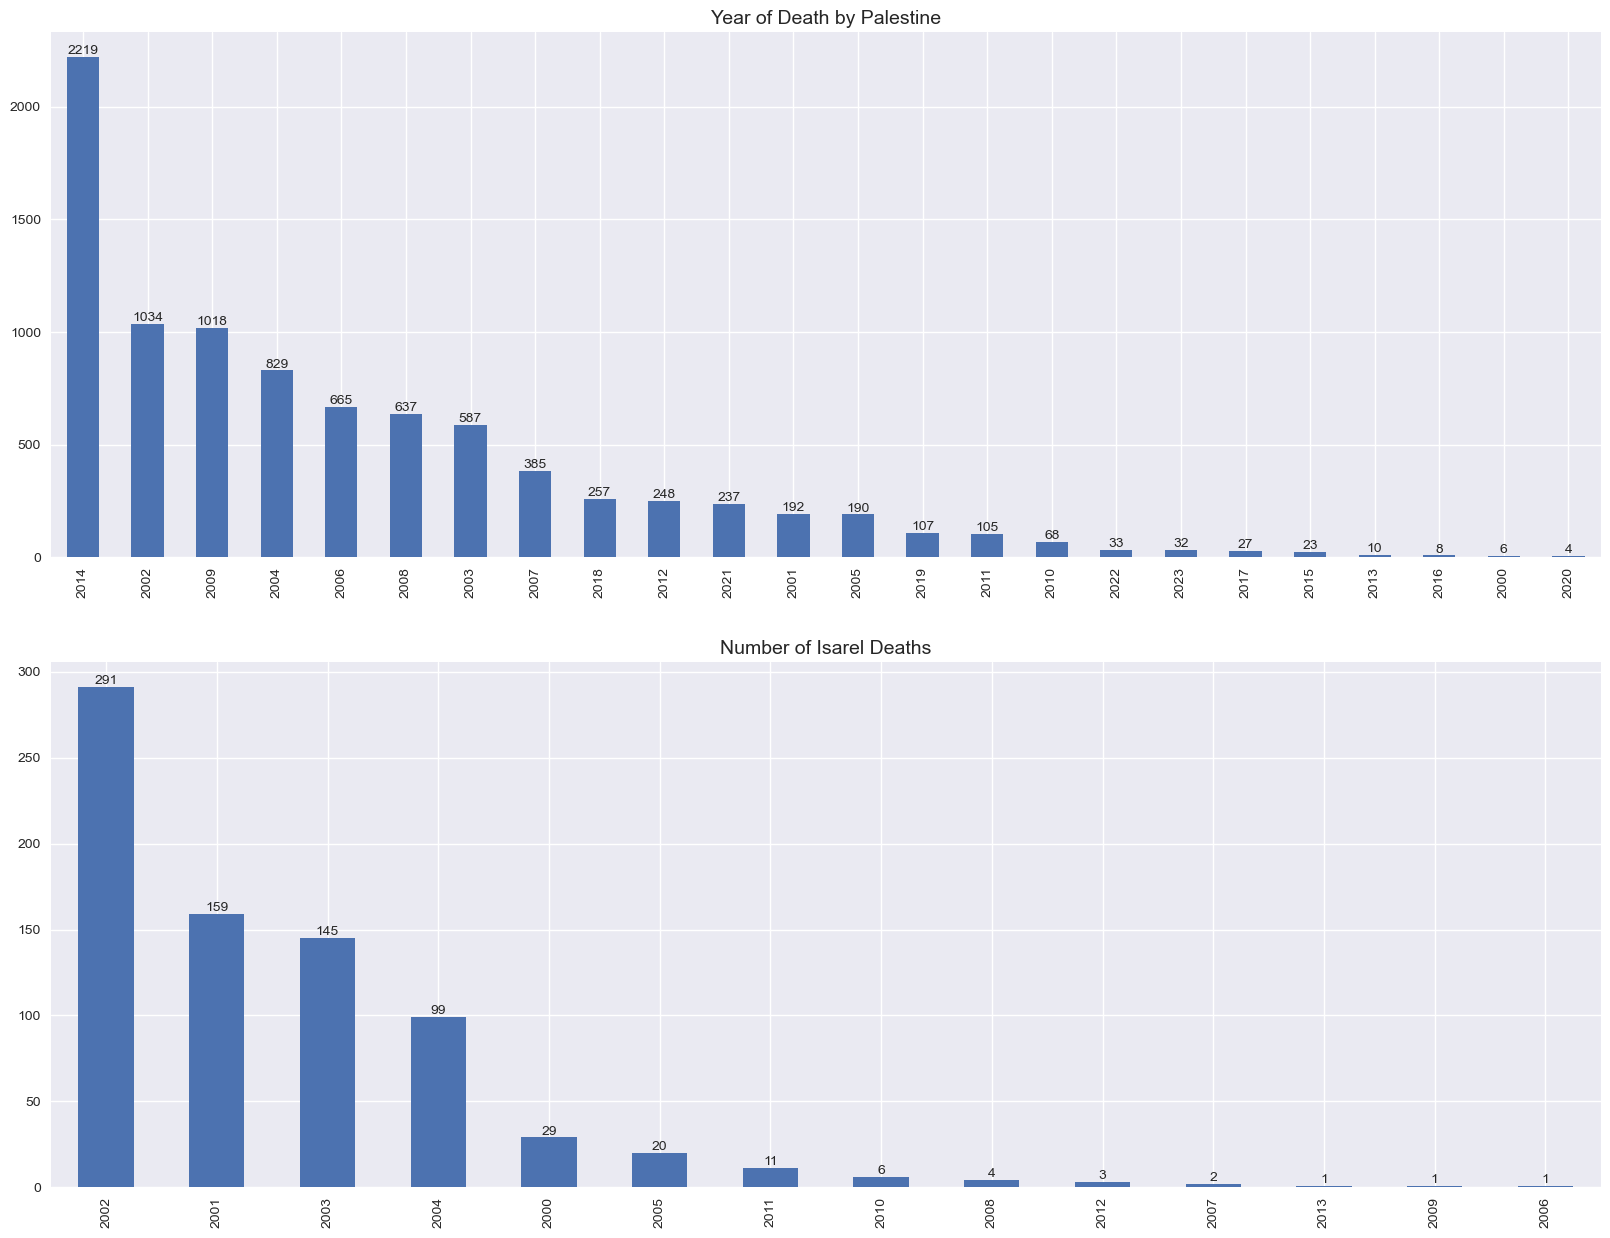

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.title("Year of Death by Palestine",fontsize=14)
ax = df["year"][df["citizenship"]=="Palestinian"].value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

plt.subplot(2,1,2)
plt.title("Number of Isarel Deaths",fontsize=14)
ax = df["year"][df["citizenship"]=="Israeli"].value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

<AxesSubplot:title={'center':'Fatalities over time'}, xlabel='date_of_event'>

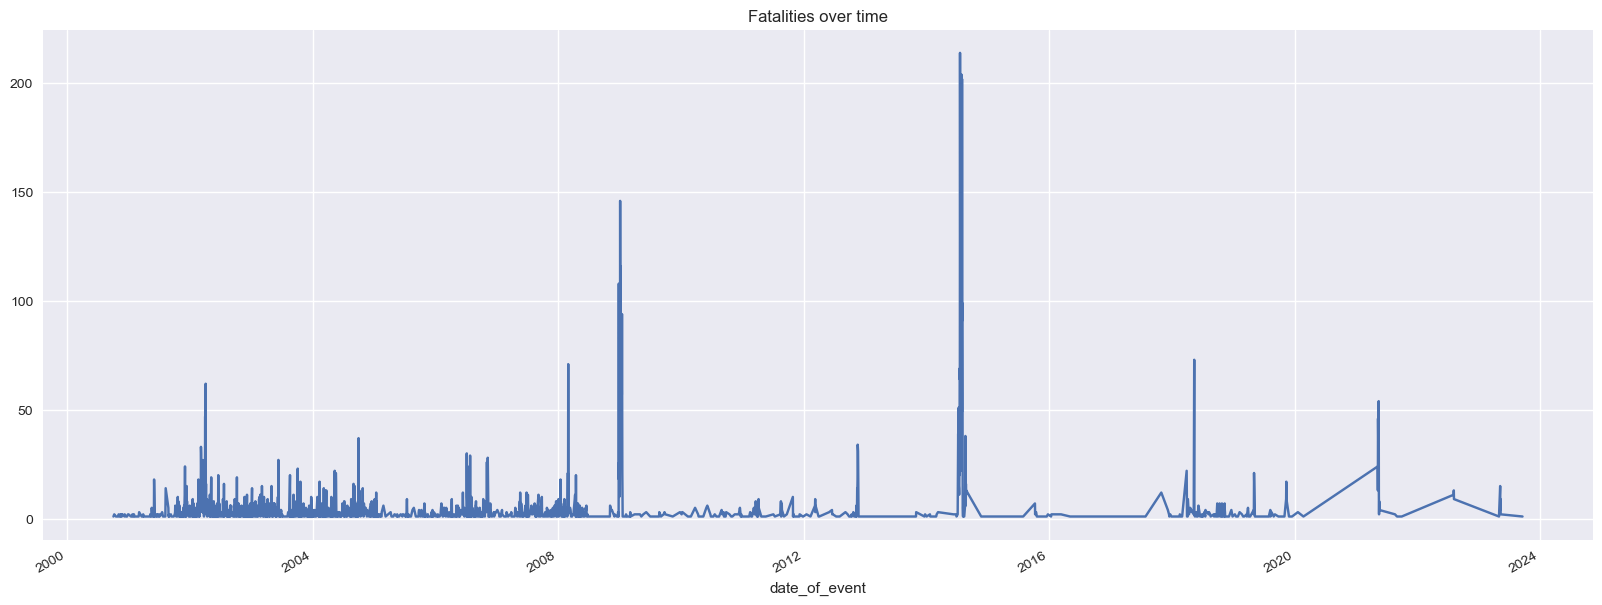

In [30]:
plt.figure(figsize=(20,7.5))
plt.title("Fatalities over time")
df.groupby("date_of_event").size().plot()

array([[<AxesSubplot:title={'center':'date_of_event'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'date_of_death'}>, <AxesSubplot:>]],
      dtype=object)

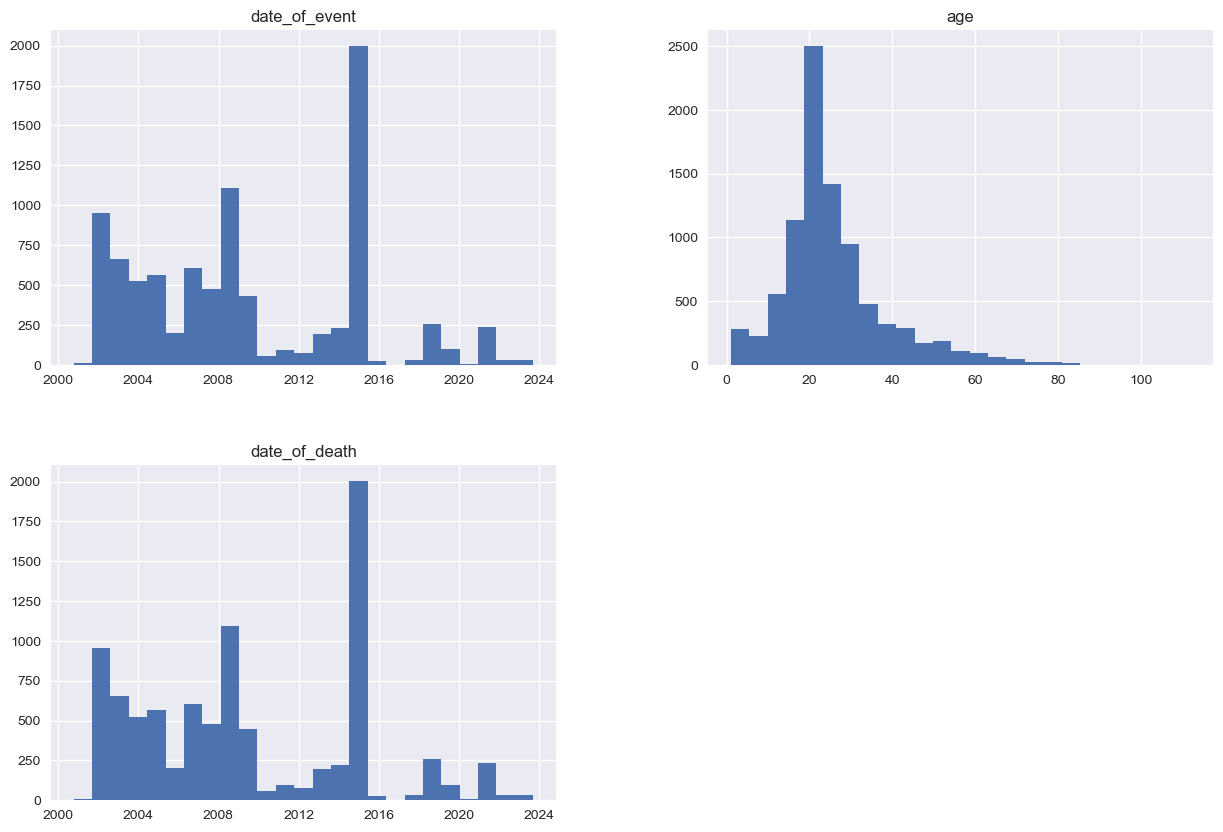

In [31]:
df.groupby("citizenship").get_group("Palestinian").hist(bins=25,figsize=(15,10))

In [32]:
pd.crosstab(df.gender,df.citizenship)

citizenship,Israeli,Jordanian,Palestinian
gender,,,
F,278,1,1046
M,494,0,7875


<Figure size 1000x1500 with 0 Axes>

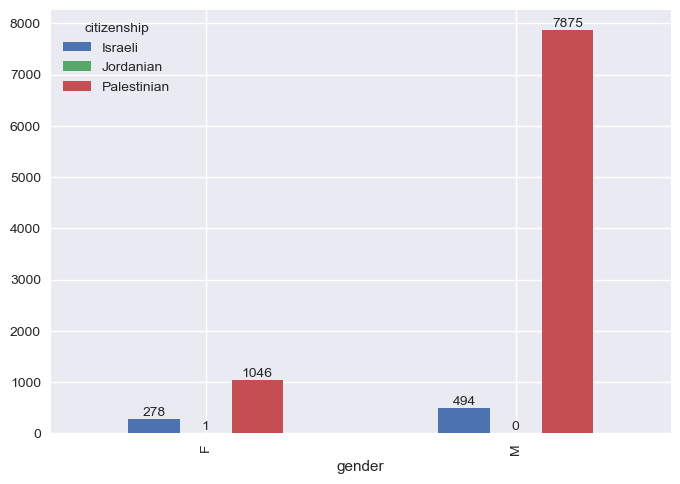

In [33]:
plt.figure(figsize=(10,15))
ax = pd.crosstab(df.gender,df.citizenship).plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

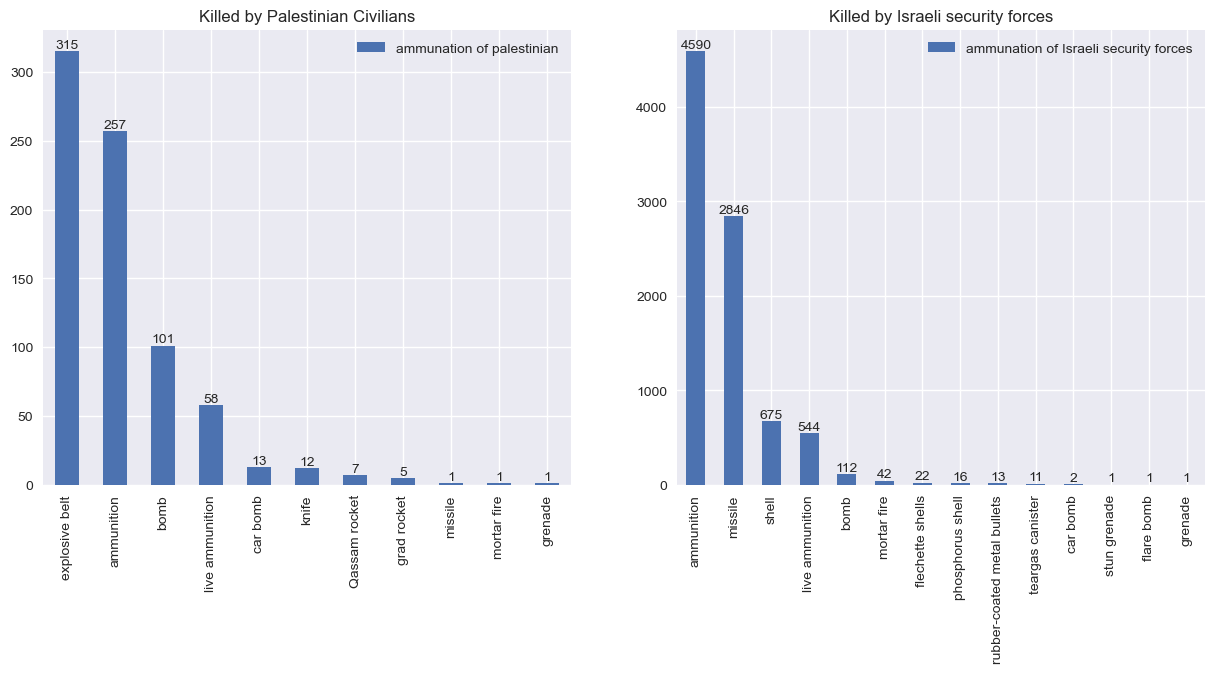

In [34]:
plt.figure(figsize=(15,13))

plt.subplot(2,2,1)
plt.title("Killed by Palestinian Civilians",fontsize=12)
ax = df["ammunition"][df["killed_by"]=="Palestinian civilians"].value_counts().plot(kind="bar",label="ammunation of palestinian")
plt.legend()
for i in ax.containers:
    ax.bar_label(i)

plt.subplot(2,2,2)
plt.title("Killed by Israeli security forces")
ax=df["ammunition"][df["killed_by"]=="Israeli security forces"].value_counts().plot(kind="bar",label="ammunation of Israeli security forces")
plt.legend()
for i in ax.containers:
    ax.bar_label(i)

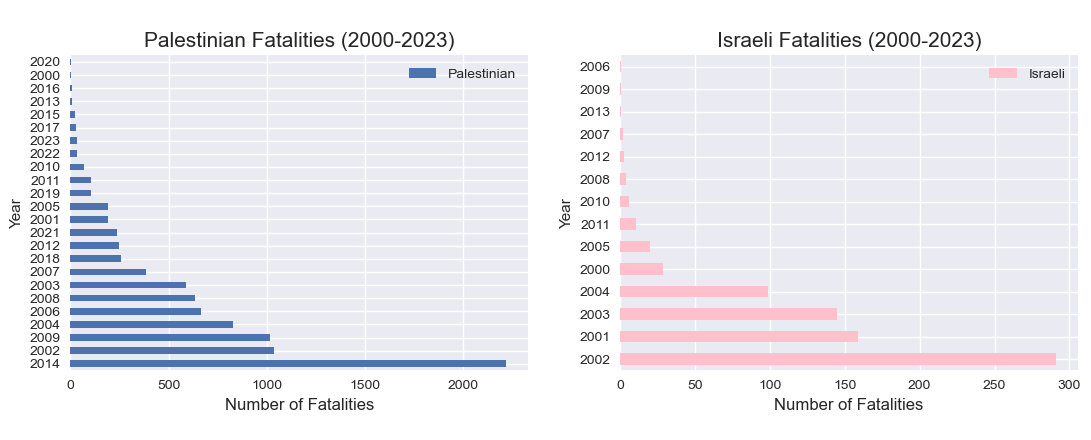

In [35]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)

plt.title('Palestinian Fatalities (2000-2023)',fontsize=15)
df["year"][df.citizenship=="Palestinian"].value_counts().plot(kind="barh",label="Palestinian")
plt.xlabel('Number of Fatalities\n',fontsize=12)
plt.ylabel('Year')
plt.legend()

plt.subplot(2,2,2)
df["year"][df["citizenship"]=="Israeli"].value_counts().plot(kind="barh",color="pink",label="Israeli");
plt.xlabel('Number of Fatalities',fontsize=12)
plt.title('\nIsraeli Fatalities (2000-2023)',fontsize=15)
plt.legend()
plt.ylabel('Year');

In [47]:
df.drop("S.No",axis=1,inplace=True)

In [49]:
df.to_csv("Fatalites")

,index,S.No
0,6,9694
1,94,9695
2,95,9696
3,96,9697
4,98,9698
...,...,...
9689,11119,19383
9690,11120,19384
9691,11121,19385
9692,11122,19386
